In [18]:

import pandas as pd
from glob import glob
import missingno as msno


## Data Pre-Processing
The data behind the Airbnb site is sourced from publicly available information from the Airbnb site.

The data has been analyzed, cleansed and scraped form 15 January 2019 to 12 January 2020.

Get the DATAIf you would like to do further analysis or produce alternate visualisations of the data, it is available below under a Creative Commons CC0 1.0 Universal (CC0 1.0) "Public Domain Dedication" license.

I download 12 csv files from 15 January 2019 to 12 January 2020 and will get it merge into one file in assending order. 


In [55]:


# Use glob to sort the list in assending
stock_files = sorted(glob('*.csv'))

# Concat all the separate CSV files into one dataframe
listing = pd.concat((pd.read_csv(file).assign(filename=file) for file in stock_files), ignore_index=True)



In [56]:
listing.head(4)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,filename
0,1078,https://www.airbnb.com/rooms/1078,20190114203221,2019-01-15,*UT/Hyde Park Craftsman Apartment,This upstairs apartment is surrounded by trees...,The garage apartment was built in the 1920s an...,This upstairs apartment is surrounded by trees...,none,"Hyde Park is close to downtown, UT, 6th street...",What to expect. We really want you to have ...,We are 1 block from the 1 or 5 bus routes that...,Their own apartment and a large garden with se...,It is always a treat to meet guests at checkin...,Make yourself at home! * From 2:00 on the day ...,NaN,NaN,https://a0.muscache.com/im/pictures/52472f12-2...,NaN,4635658,https://www.airbnb.com/users/show/4635658,Tracy,2013-01-08,"Austin, Texas, United States",Austin Tx - music capitol of the world,NaN,NaN,NaN,t,https://a0.muscache.com/im/users/4635658/profi...,https://a0.muscache.com/im/users/4635658/profi...,University of Texas,3.0,3.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Austin, TX, United States",NaN,78705,NaN,Austin,TX,78705,Austin,"Austin, TX",US,United States,30.301231,-97.736736,t,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",NaN,$85.00,$575.00,"$1,999.00",NaN,$35.00,2,$125.00,1,365,1,1,365,365,1.0,365.0,today,t,0,0,0,0,2019-01-15,208,0,2008-09-13,2017-07-14,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Texas State""}",t,f,flexible,f,f,3,3,0,0,1.65,a.csv
1,2265,https://www.airbnb.com/rooms/2265,20190114203221,2019-01-14,Zen-East in the Heart of Austin,Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,A 2013 Genuine Buddy Scooter 125 may be availa...,5 min walk to Capitol Metro Rail (train that t...,"Several local restaurants, small clubs, music ...","Depending on your dates and arrival time, I am...",• Check-in time is 4 pm. Check out is 11 am. I...,NaN,NaN,https://a0.muscache.com/im/pictures/4740524/63...,NaN,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East 

In [57]:
listing.isnull().sum()

id                                                   0
listing_url                                          0
scrape_id                                            0
last_scraped                                         0
name                                                 5
summary                                           4870
space                                            36596
description                                       1721
experiences_offered                                  0
neighborhood_overview                            52070
notes                                            81275
transit                                          56255
access                                           57417
interaction                                      51885
house_rules                                      49450
thumbnail_url                                   150614
medium_url                                      150614
picture_url                                          0
xl_picture

In [58]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150614 entries, 0 to 150613
Columns: 107 entries, id to filename
dtypes: float64(23), int64(22), object(62)
memory usage: 123.0+ MB


<AxesSubplot:>

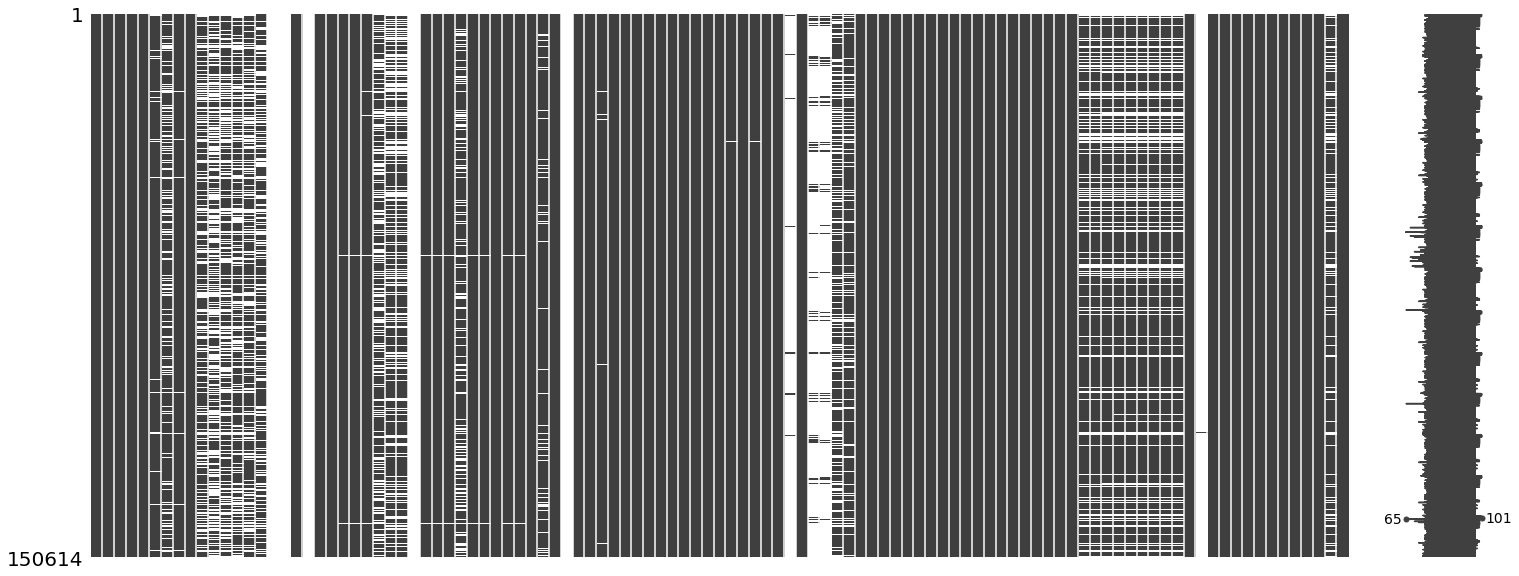

In [59]:
# Checking for missing values and any correlation between them
# Using this matrix you can very quickly find the pattern of missingness in the dataset.

msno.matrix(listing)


In [ ]:
msno.bar(listing)

In [ ]:
msno.heatmap(listing)

### Cleaning the data


In [ ]:
listing.info('*')


In [66]:
data = listing[
    ['id', 'last_scraped', 'host_name', 'host_since', 'host_location', 'host_response_rate', 'host_is_superhost', 'city', 'zipcode', 'latitude', 'longitude', 'property_type',
     'room_type', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 'bed_type', 'price',
     'security_deposit', 'cleaning_fee', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
     'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy',
     'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
     'review_scores_value', 'instant_bookable', 'reviews_per_month','neighbourhood_cleansed ']]


# converting object to date
data['host_since'] = pd.to_datetime(data['host_since'])
data['first_review'] = pd.to_datetime(data['first_review'])
data['last_review'] = pd.to_datetime(data['last_review'])

# Converting Percentage
# data['host_response_rate'] = pd.to_numeric(data['host_response_rate'].apply(lambda x: str(x).replace('%', '').replace('nan', '')),errors='coerce') / 100
# data['host_acceptance_rate'] = pd.to_numeric(data['host_acceptance_rate'].apply(lambda x: str(x).replace('%','').replace('nan','')),errors='coerce')/100

KeyError: 'host_response_rate'

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150614 entries, 0 to 150613
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           150614 non-null  int64  
 1   last_scraped                 150614 non-null  object 
 2   host_name                    150384 non-null  object 
 3   host_since                   150384 non-null  object 
 4   host_location                149976 non-null  object 
 5   host_response_time           100232 non-null  object 
 6   host_acceptance_rate         0 non-null       float64
 7   host_is_superhost            150384 non-null  object 
 8   city                         150587 non-null  object 
 9   zipcode                      149207 non-null  object 
 10  latitude                     150614 non-null  float64
 11  longitude                    150614 non-null  float64
 12  property_type                150614 non-null  object 
 13 

In [81]:

data.to_csv('data.csv', index=False)

In [ ]:
msno.matrix(data)

<AxesSubplot:>

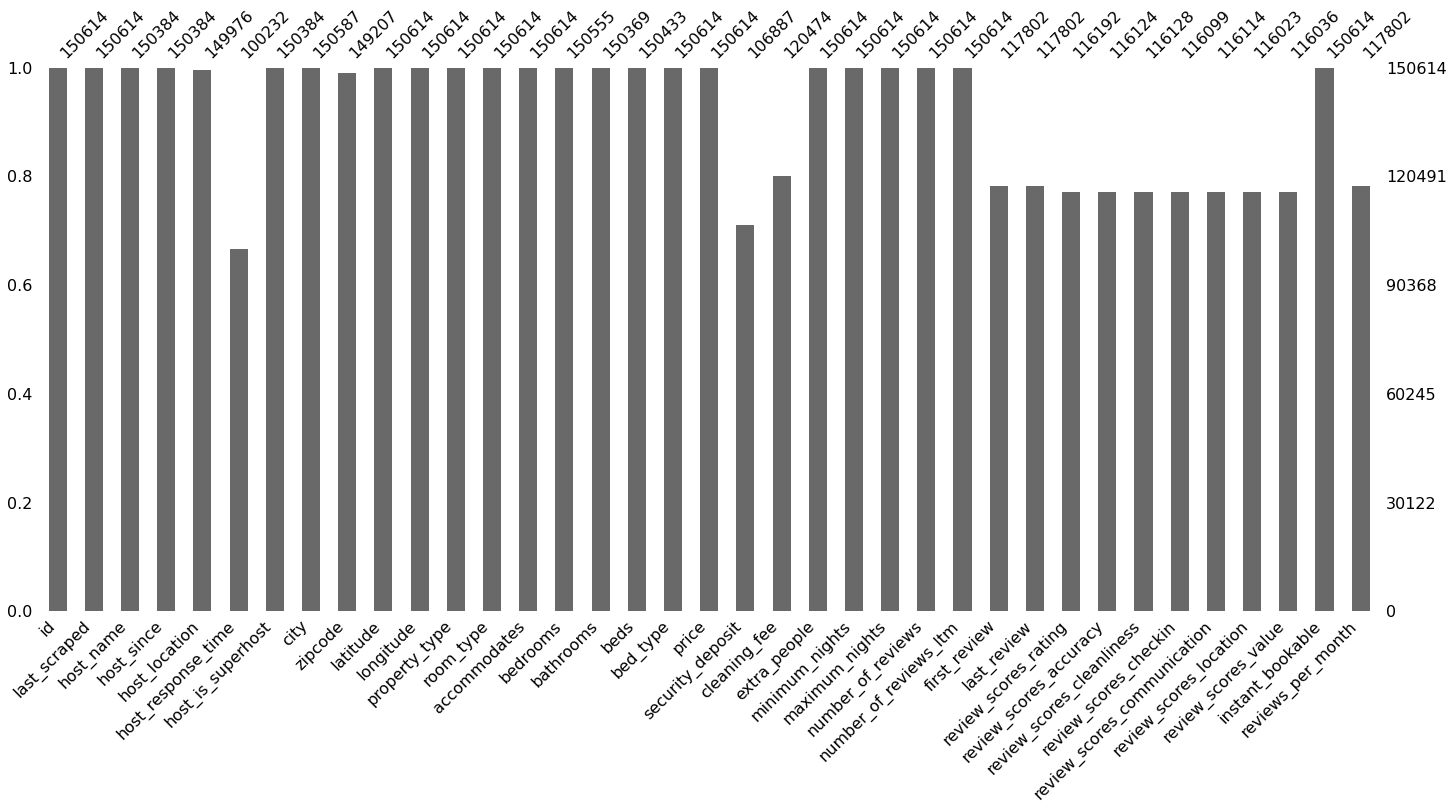

In [67]:
# Weekly_price and Montyly_price is most missing values
msno.bar(data)


<AxesSubplot:>

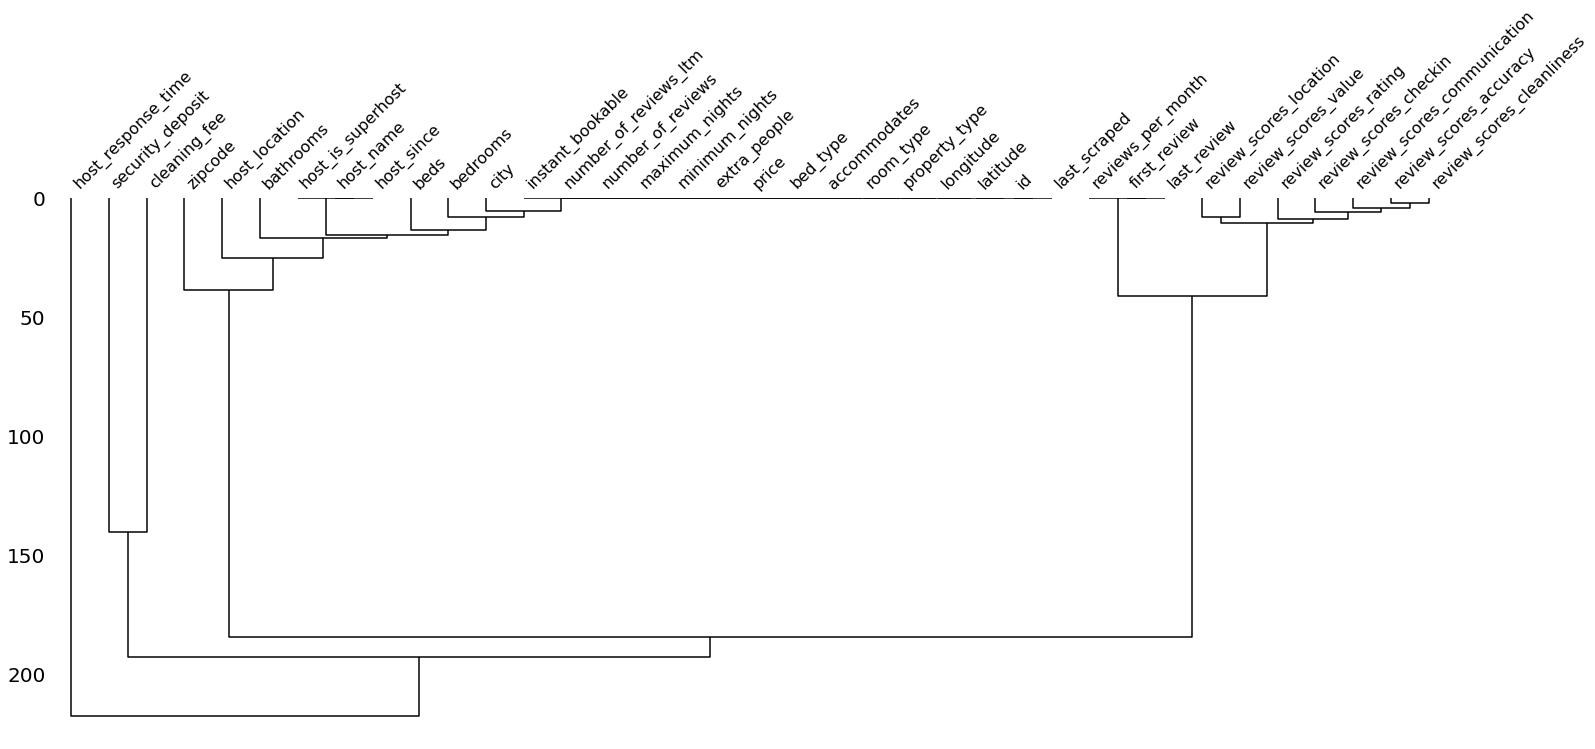

In [79]:
msno.dendrogram(data)

#### The average price by zip code is not accurate as we can see in the graph below.

In [15]:
%%HTML
<div class='tableauPlaceholder' id='viz1611551459099' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book1_16115357134900&#47;Sheet1&#47;1_rss.png' style='border: fit' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book1_16115357134900&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book1_16115357134900&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1611551459099');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>